In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 6)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
transform = transforms.Compose(
    [transforms.Resize((32, 32)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./fruits', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./fruits', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('Pineapple', 'Pineapple Mini', 'Raspberry', 'Redcurrant','Strawberry', 'Strawberry Wedge')

100%|██████████| 170498071/170498071 [00:10<00:00, 15863176.24it/s]


Extracting ./fruits/cifar-10-python.tar.gz to ./fruits
Files already downloaded and verified


In [ ]:
net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
losses = []
for epoch in range(2):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            losses.append(running_loss / 2000)
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.193
[1,  4000] loss: 1.185
[1,  6000] loss: 1.190
[1,  8000] loss: 1.190
[1, 10000] loss: 1.186
[1, 12000] loss: 1.165
[2,  2000] loss: 1.074
[2,  4000] loss: 1.085
[2,  6000] loss: 1.094
[2,  8000] loss: 1.077
[2, 10000] loss: 1.093
[2, 12000] loss: 1.100
Finished Training


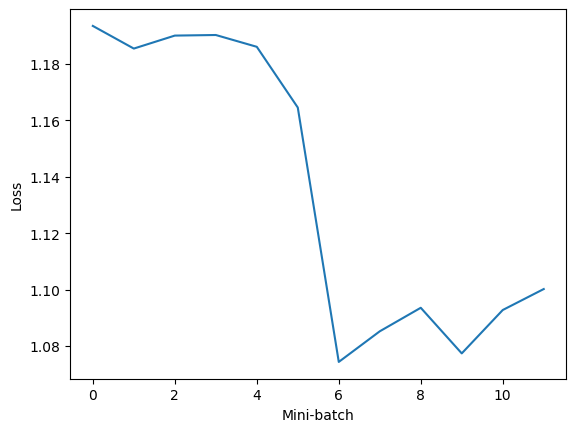

In [ ]:
plt.plot(losses)
plt.xlabel('Mini-batch')
plt.ylabel('Loss')
plt.show()

In [ ]:
net.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(predicted.numpy())

print(confusion_matrix(y_true, y_pred))

[[669  19  28  11  17   7  21  13 167  48]
 [ 33 709   5  15   1   0  29   8  58 142]
 [130   6 444  84  68  70 115  54  20   9]
 [ 54  13  66 420  54 158 106  59  32  38]
 [ 52   5 113  80 445  45 134  98  23   5]
 [ 33   5  78 199  42 443  63 100  19  18]
 [  7   3  49  82  27  18 783  14  12   5]
 [ 34   5  26  61  74  61  35 673   9  22]
 [ 87  32   8  13   6   2  20   7 782  43]
 [ 34  98   6  18   3   4  32  37  57 711]]


In [26]:
print(classification_report(y_true, y_pred,labels=np.arange(0,len(classes),1),target_names=classes, digits=10,zero_division=0))

                  precision    recall  f1-score   support

       Pineapple  0.5904677846 0.6690000000 0.6272855134      1000
  Pineapple Mini  0.7921787709 0.7090000000 0.7482849604      1000
       Raspberry  0.5394896719 0.4440000000 0.4871091607      1000
      Redcurrant  0.4272634791 0.4200000000 0.4236006051      1000
      Strawberry  0.6037991859 0.4450000000 0.5123776626      1000
Strawberry Wedge  0.5482673267 0.4430000000 0.4900442478      1000

       micro avg  0.5818925451 0.5216666667 0.5501362158      6000
       macro avg  0.5835777032 0.5216666667 0.5481170250      6000
    weighted avg  0.5835777032 0.5216666667 0.5481170250      6000



# 3


Минимум функции y(x) на отрезке [-10.75, -9]: x = -9.7503023147583, y = -28.115718841552734


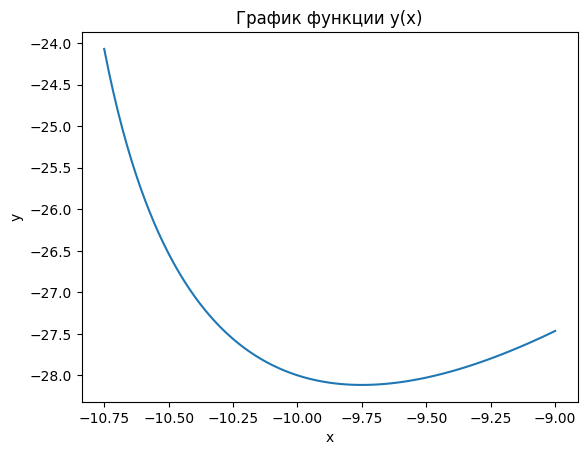

In [27]:
import torch
import matplotlib.pyplot as plt

# Определяем функцию y(x)
def y(x):
    return 4*x - 5*torch.log(x+11) + 12

# Определяем отрезок [-10.75, -9]
a = -10.75
b = -9

# Определяем точность поиска экстремума
eps = 0.001

# Определяем начальную точку
x = torch.tensor([(a+b)/2], requires_grad=True)

# Определяем оптимизатор и запускаем процесс оптимизации
optimizer = torch.optim.SGD([x], lr=0.01)
while True:
    optimizer.zero_grad()
    y_val = y(x)
    y_val.backward()
    optimizer.step()
    if abs(x.grad) < eps:
        break

# Выводим результаты
print('Минимум функции y(x) на отрезке [{}, {}]: x = {}, y = {}'.format(a, b, x.item(), y(x).item()))

# Отображаем график функции y(x) на заданном отрезке
x_vals = torch.linspace(a, b, 100)
y_vals = y(x_vals)
plt.plot(x_vals, y_vals)
plt.xlabel('x')
plt.ylabel('y')
plt.title('График функции y(x)')
plt.show()